In [1]:
import torch
import numpy as np
import gym
from gym.spaces import Discrete, Box
from policy import MlpPolicy, DiagonalGaussianMlpPolicy, LinearCritic
from utils import get_inner_model
from copy import deepcopy
import math
import torch.optim as optim
from utils import env_wrapper
from highway_env import __init__
import pprint


In [4]:
env = gym.make('highway-v0')
env.reset()

array([[ 1.00000000e+00,  1.00000000e+00,  3.33333333e-01,
         4.16666667e-01,  0.00000000e+00],
       [ 1.00000000e+00,  1.55714476e-01,  0.00000000e+00,
        -1.38357040e-02,  0.00000000e+00],
       [ 1.00000000e+00,  3.01759508e-01, -3.33333333e-01,
        -6.27352461e-03,  0.00000000e+00],
       [ 1.00000000e+00,  4.45431843e-01, -3.33333333e-01,
        -4.40762491e-04,  0.00000000e+00],
       [ 1.00000000e+00,  5.75116132e-01,  0.00000000e+00,
        -2.92735381e-02,  0.00000000e+00],
       [ 1.00000000e+00,  7.13473168e-01,  0.00000000e+00,
        -2.10318469e-02,  0.00000000e+00],
       [ 1.00000000e+00,  8.61188840e-01,  3.33333333e-01,
        -2.05359604e-02,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00, -3.33333333e-01,
        -1.64280798e-02,  0.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  3.33333333e-01,
        -2.19061823e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00

In [2]:
env = gym.make('highway-v0')
env.reset()

array([[ 1.        ,  1.        ,  0.        ,  0.41666667,  0.        ],
       [ 1.        ,  0.73476052,  0.66666667, -0.01474366,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.4428166 ,  0.        , -0.00352717,  0.        ],
       [ 1.        ,  0.30522285,  0.        , -0.01219088,  0.        ],
       [ 1.        ,  0.59630259,  0.33333333, -0.02029   ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.15213398,  0.        , -0.02908884,  0.        ],
       [ 1.        ,  1.        ,  0.33333333, -0.00432707,  0.        ],
       [ 1.        ,  1.        ,  0.33333333, -0.01489333,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0. 

In [3]:
env.render()

[[ 1.          1.          0.          0.41666667  0.        ]
 [ 1.          0.13849769  0.         -0.0289729   0.        ]
 [ 1.          0.27323365  0.33333333 -0.02140837  0.        ]
 [ 1.          0.42690484  0.33333333 -0.00429264  0.        ]
 [ 1.          0.57658859  0.66666667 -0.00943406  0.        ]]


In [9]:
env.config

{'observation': {'type': 'Kinematics',
  'features': ['presence', 'x', 'y', 'vx', 'vy'],
  'absolute': False,
  'order': 'sorted'},
 'action': {'type': 'DiscreteMetaAction'},
 'simulation_frequency': 10,
 'policy_frequency': 1,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'screen_width': 600,
 'screen_height': 150,
 'centering_position': [0.3, 0.5],
 'scaling': 5.5,
 'show_trajectories': False,
 'render_agent': False,
 'offscreen_rendering': False,
 'manual_control': False,
 'real_time_rendering': False,
 'lanes_count': 3,
 'vehicles_count': 15,
 'controlled_vehicles': 1,
 'initial_lane_id': None,
 'duration': 100,
 'ego_spacing': 2,
 'vehicles_density': 1,
 'collision_reward': -5,
 'reward_speed_range': [20, 30],
 'offroad_terminal': False}

In [9]:
from options import get_options
opts = get_options()

import json
import pprint
from agent import Agent
from worker import Worker
from options import get_options
from utils import get_inner_model

agent = Agent(opts)

usage: ipykernel_launcher.py [-h] [--env_name ENV_NAME] [--eval_only]
                             [--no_cuda] [--do_saving] [--no_tb] [--seed SEED]
                             [--render] [--multiple_run MULTIPLE_RUN]
                             [--val_size VAL_SIZE] [--num_worker NUM_WORKER]
                             [--num_Byzantine NUM_BYZANTINE]
                             [--attack_type {sign-flipping,zero-gradient,random-noise,detect-attack}]
                             [--activation ACTIVATION]
                             [--output_activation OUTPUT_ACTIVATION] [--svrg]
                             [--scsg] [--with_filter] [--alpha ALPHA]
                             [--delta DELTA] [--sigma SIGMA]
                             [--load_path LOAD_PATH] [--log_dir LOG_DIR]
                             [--run_name RUN_NAME]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/chihuijue/Library/Jupyter/runtime/kernel-4699ea70-6e59-4e0a-a922-d7fdfa7651d2.json


SystemExit: 2

In [13]:
from torch.distributions.categorical import Categorical
a = (torch.rand(5) - 0.5)*2
print(a)

tensor([ 0.6046, -0.8513,  0.9254,  0.9436, -0.0161])


In [18]:
a = torch.softmax(a, -1)

policy = Categorical(a)
policy.probs

tensor([0.2197, 0.0512, 0.3027, 0.3083, 0.1181])

MovieWriter imagemagick unavailable; using Pillow instead.


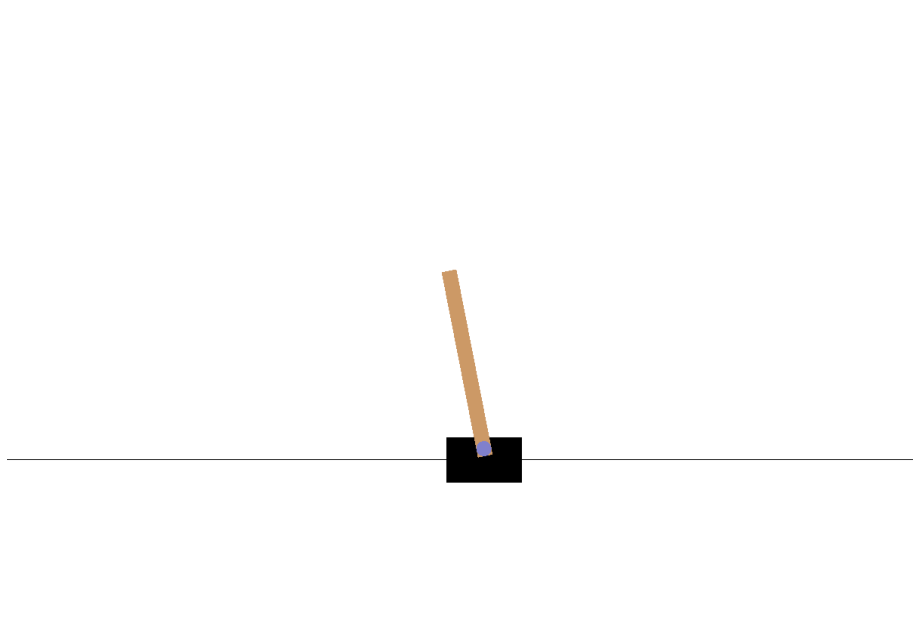

In [22]:
from matplotlib import animation
import matplotlib.pyplot as plt
def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)
    
    
env = gym.make('CartPole-v1')

#Run the env
observation = env.reset()
frames = []
for t in range(1000):
    #Render to frames buffer
    frames.append(env.render(mode="rgb_array"))
    action = env.action_space.sample()
    _, _, done, _ = env.step(action)
    if done:
        break
env.close()
save_frames_as_gif(frames)